In [1]:
# === Install Packages ===
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython.display import clear_output

In [2]:
# === Define a Board ===
SIZE = 4  # Board Size
data = np.zeros((SIZE+2, SIZE+2), dtype=int)
for y in range(SIZE+2):
    for x in range(SIZE+2):
        if x == 0 or x == SIZE+1 or y == 0 or y == SIZE+1:
            data[y][x] = 6  # Sentinel

# Initial Ink Positions（11=red, 22=blue, 33=green）
inks = {(2,2): 11, (2,4): 22, (3,3): 33}
for (y, x), v in inks.items():
    data[y][x] = v

# Initial Player Settings
px, py = 2, 3
player_color = 0 # No color

# Target
target_scores = {'red': 10, 'blue': 2, 'green': 4}
scores = {'red':0, 'blue':0, 'green':0}

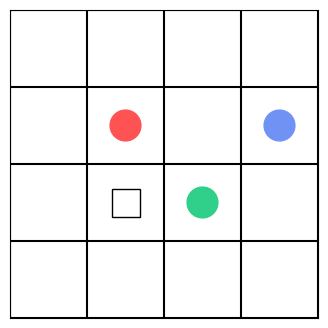

In [3]:
# === Draw a Board ===
def draw_board(data, px, py):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(SIZE, SIZE))
    ax.set_xlim(0, SIZE)
    ax.set_ylim(0, SIZE)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")

    # Grid
    for x in range(SIZE + 1):
        ax.plot([x, x], [0, SIZE], color="black")
    for y in range(SIZE + 1):
        ax.plot([0, SIZE], [y, y], color="black")

    # Each Tile
    for y in range(1, SIZE+1):
        for x in range(1, SIZE+1):
            val = data[y][x]
            if val == 1 or val == 11:
                color = "#ff5252"  # red
            elif val == 2 or val == 22:
                color = "#7192f5"  # blue
            elif val == 3 or val == 33:
                color = "#30cf8a"  # green
            else:
                color = "white"
            if val in (1, 2, 3): # Filled
                ax.add_patch(plt.Rectangle((x-1, SIZE-y), 1, 1, color=color))
            elif val in (11, 22, 33): # Inks
                ax.add_patch(plt.Circle((x-0.5, SIZE-y+0.5), 0.2, color=color))

    # Player
    ax.plot([px-0.5], [SIZE-py+0.5], marker="s", color='black', markerfacecolor="none", markersize=20)

    plt.show()

# Initial Board
draw_board(data, px, py)

In [4]:
# Get Possible Movement Directions
def get_possible_moves(data, px, py, player_color):
    directions = {
        "up": (0, -1),
        "right": (1, 0),
        "down": (0, 1),
        "left": (-1, 0)
    }
    moves = []
    for name, (dx, dy) in directions.items():
        nx, ny = px + dx, py + dy
        cell = data[ny][nx]
        if cell == 6:  # Sentinel
            continue
        # Cannot move to the other colors
        if cell > 0 and cell not in (11, 22, 33) and cell != player_color:
            continue
        moves.append((name, dx, dy))
    return moves

# Whether all tiles are filled
def all_tiles_colored(data):
    # Disclude sentinels
    for y in range(1, SIZE + 1):
        for x in range(1, SIZE + 1):
            if data[y][x] == 0:
                return False
    return True

# Judge if clearable
def can_fill_more(data, player_color):
    """Is able to fill anymore tiles"""
    directions = [(0,-1), (0,1), (-1,0), (1,0)]
    for y in range(1, SIZE+1):
        for x in range(1, SIZE+1):
            if data[y][x] != player_color:
                continue
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if data[ny][nx] == 6:
                    continue
                if data[ny][nx] in (0, 11, 22, 33):
                    return True
    return False

def is_color_enough(scores, target_scores, player_color):
    """Is scores enough to reach target scores"""
    if scores['red'] >= 1 and scores['red'] < target_scores['red'] and player_color != 1:
        return False
    if scores['blue'] >= 1 and scores['blue'] < target_scores['blue'] and player_color != 2:
        return False
    if scores['green'] >= 1 and scores['green'] < target_scores['green'] and player_color != 3:
        return False
    return True

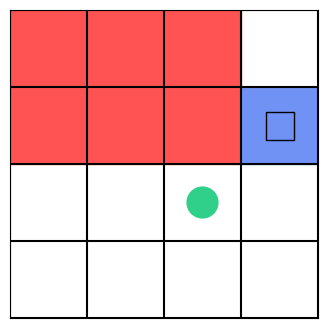

Step: 11
Game Over.


In [5]:
# === Random Play ===
def random_play(data, px, py, player_color, delay=0.3):
    step = 0
    while True:
        # Update Scores
        scores['red'] = np.sum(data == 1)
        scores['blue'] = np.sum(data == 2)
        scores['green'] = np.sum(data == 3)

        if all_tiles_colored(data):
            print("All Tiles are Filled. Cleared.")
            break
        if not can_fill_more(data, player_color) or not is_color_enough(scores, target_scores, player_color) or scores['red'] > target_scores['red'] or scores['blue'] > target_scores['blue'] or scores['green'] > target_scores['green']:
            print("Game Over.")
            break

        moves = get_possible_moves(data, px, py, player_color)
        _, dx, dy = random.choice(moves)
        nx, ny = px + dx, py + dy
        cell = data[ny][nx]

        # move
        px, py = nx, ny

        # Get Inks
        if cell == 11:
            player_color = 1
        elif cell == 22:
            player_color = 2
        elif cell == 33:
            player_color = 3

        # Fill the tiles
        if player_color > 0:
            data[py][px] = player_color
            step += 1

        draw_board(data, px, py)
        print(f"Step: {step}")
        time.sleep(delay)

    return data

# Execution
data_copy = data.copy()
final_state = random_play(data_copy, px, py, player_color, delay=0.5)